# Basic Autoencoder

1 encoding layer <-> 1 decoding layer

784 -> 32 -> 784
![](img/autoencoder_schema.jpg)

In [1]:
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt

Input and output dimensons depends on data, while the code dimension is a parameter.

In [2]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats#

Let's create the autoencoder model!

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

We can also get intermediate results from the encoding and decoding layers

In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Now we can just "compile" the autoencoder setting the optimizer and loss functions

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Now we import the dataset

In [6]:
from tensorflow.python.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

And we can start the training.
Arguments:
* `x,y`:input and output are the same since we want to compress and reconstruct
* `epochs`: Number of epochs to train the model. An epoch is an iteration over the entire data provided
* `batch_size`:  Number of samples per gradient update
* `shuffle`: shuffle data every epoch
* `validation_data`: evaluate the loss at the end of each epoch. **The model will not be trained on this data.**

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 1s 3ms/step - loss: 0.2769 - val_loss: 0.1916
Epoch 2/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1723 - val_loss: 0.1555
Epoch 3/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1466 - val_loss: 0.1358
Epoch 4/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1302 - val_loss: 0.1223
Epoch 5/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1191 - val_loss: 0.1134
Epoch 6/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1116 - val_loss: 0.1074
Epoch 7/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1063 - val_loss: 0.1029
Epoch 8/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/30
235/235 [==============================] - 1s 2ms/step - loss: 0.0996 - val_loss: 0.0972
Epoch 10/30
235/235 [==============================] - 1s 2ms/step - loss: 0.0976 - val_loss: 0.0955

The autoencoder has been trained. Now we can `predict` some digits from the test set. We use the intermediate `encoder` and `decoder` created above

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


decoded_imgs = autoencoder.predict(x_test)

And now let's plot the original versus the reconstructed ones

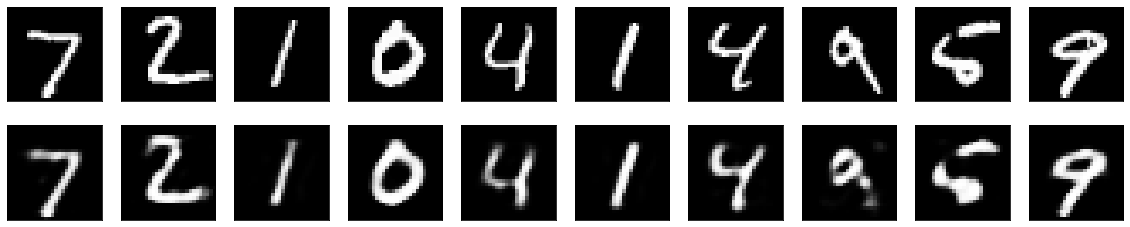

In [9]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Now we can try to increase the number of `epochs` in the `fit` function to see the results when the epoch number is increased or decreased.
Or change the optimizer from `adagrad` to the best-in-class `adam`